# Analyzing the Customer Data

# 1.Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Reading the data set

In [3]:
data=pd.read_csv("../input/customers-dataset/Customers.csv",index_col="CustomerID")# Keeping customer ID as Index
data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [4]:
data.shape #Note shape of the data set is found 

(2000, 7)

In [5]:
data.duplicated().sum() # Checking any duplicate data are present

0

In [6]:
data.info()# overview of the data set is known

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


# 3.Checking any missing/null value in data

In [7]:
data.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

> Observation : There is null value in Profession column

# 4.Filling the null values

In [8]:
data=data.fillna("Others")# Note filling null values
data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [9]:
data.tail(5)#Note Bottom  5 data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2
1999,Male,77,182109,4,Executive,7,2
2000,Male,90,110610,52,Entertainment,5,2


# 5.How many profession in data set ?

In [10]:
data["Profession"].nunique() # Note to know how many profession 

10

In [11]:
data.describe() #It gives  the satstical data

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [12]:
data.corr() 

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Age,1.000000,0.021378,-0.041798,-0.014319,0.038254
Annual Income ($),0.021378,1.000000,0.023299,0.089136,0.093005
Spending Score (1-100),-0.041798,0.023299,1.000000,-0.028948,0.002232
Work Experience,-0.014319,0.089136,-0.028948,1.000000,0.011873
Family Size,0.038254,0.093005,0.002232,0.011873,1.000000


# 6.Correlation Matrix with variable

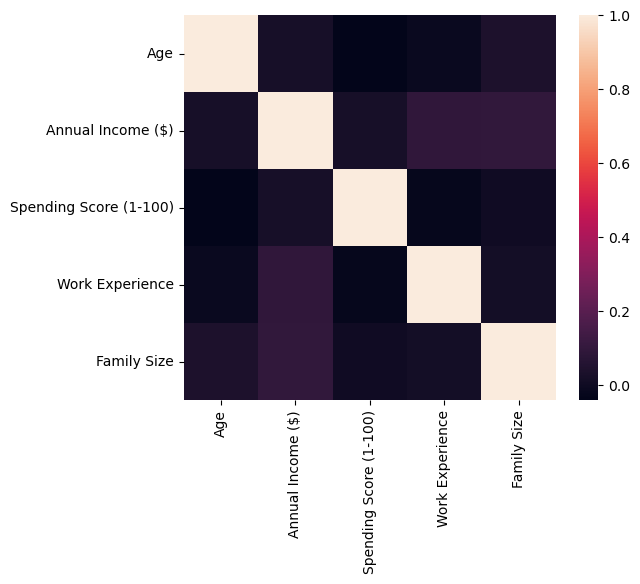

In [13]:
# To know the dependency  between variables
plt.figure(figsize=(6,5))
sns.heatmap(data.corr())
plt.show()

# 7.In Which profession most age group people are there ?

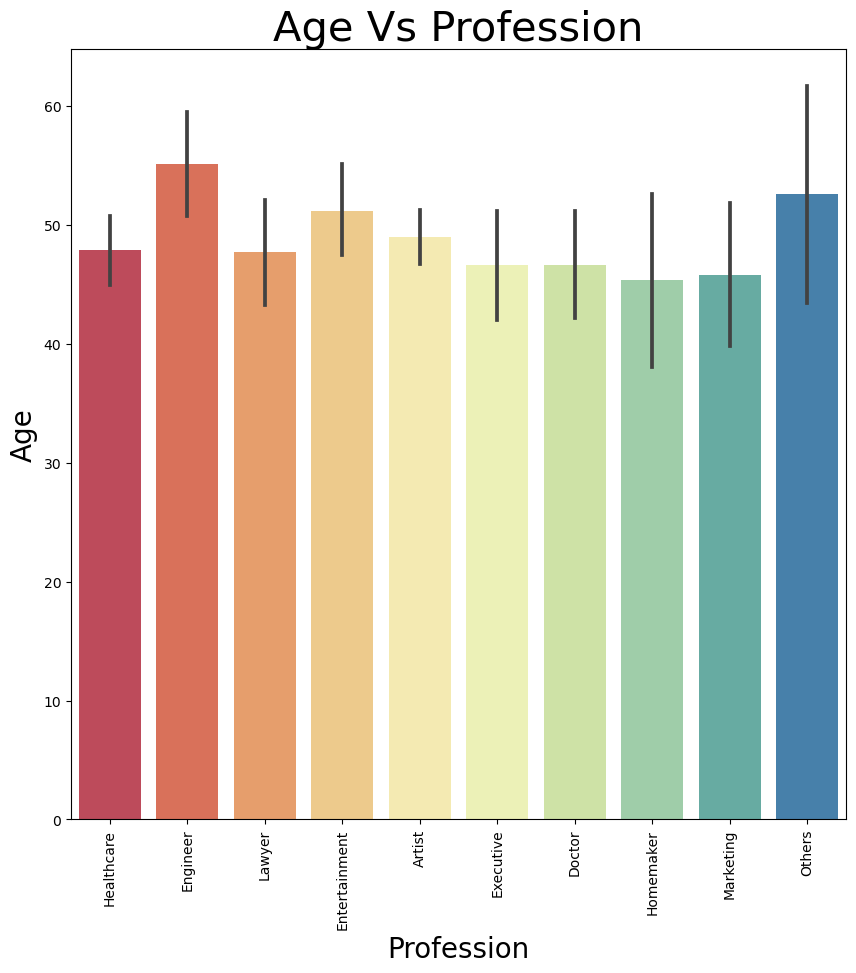

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x="Profession",y="Age",data=data,palette="Spectral")
plt.title("Age Vs Profession",fontsize=30)
plt.xlabel("Profession",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.xticks(rotation="vertical")
plt.show()

# 8.Find the Number of Male and Female ?

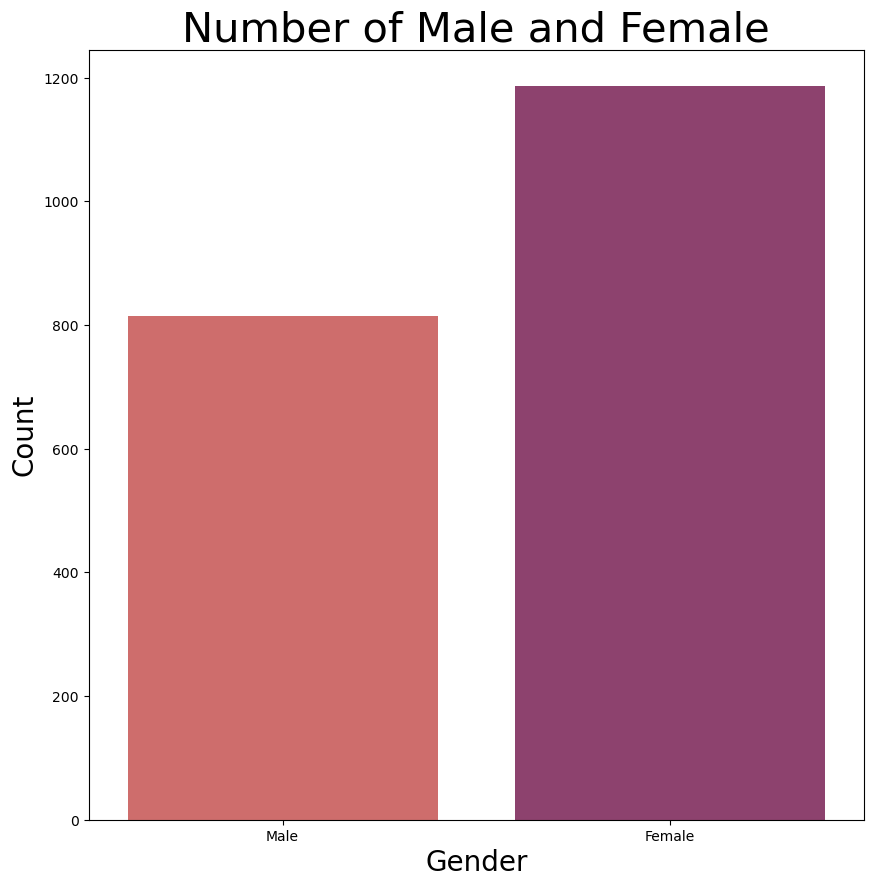

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x=data["Gender"],palette="flare")
plt.title("Number of Male and Female",fontsize=30)
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

# 9.Plotting  the annual income vs profession according to age 

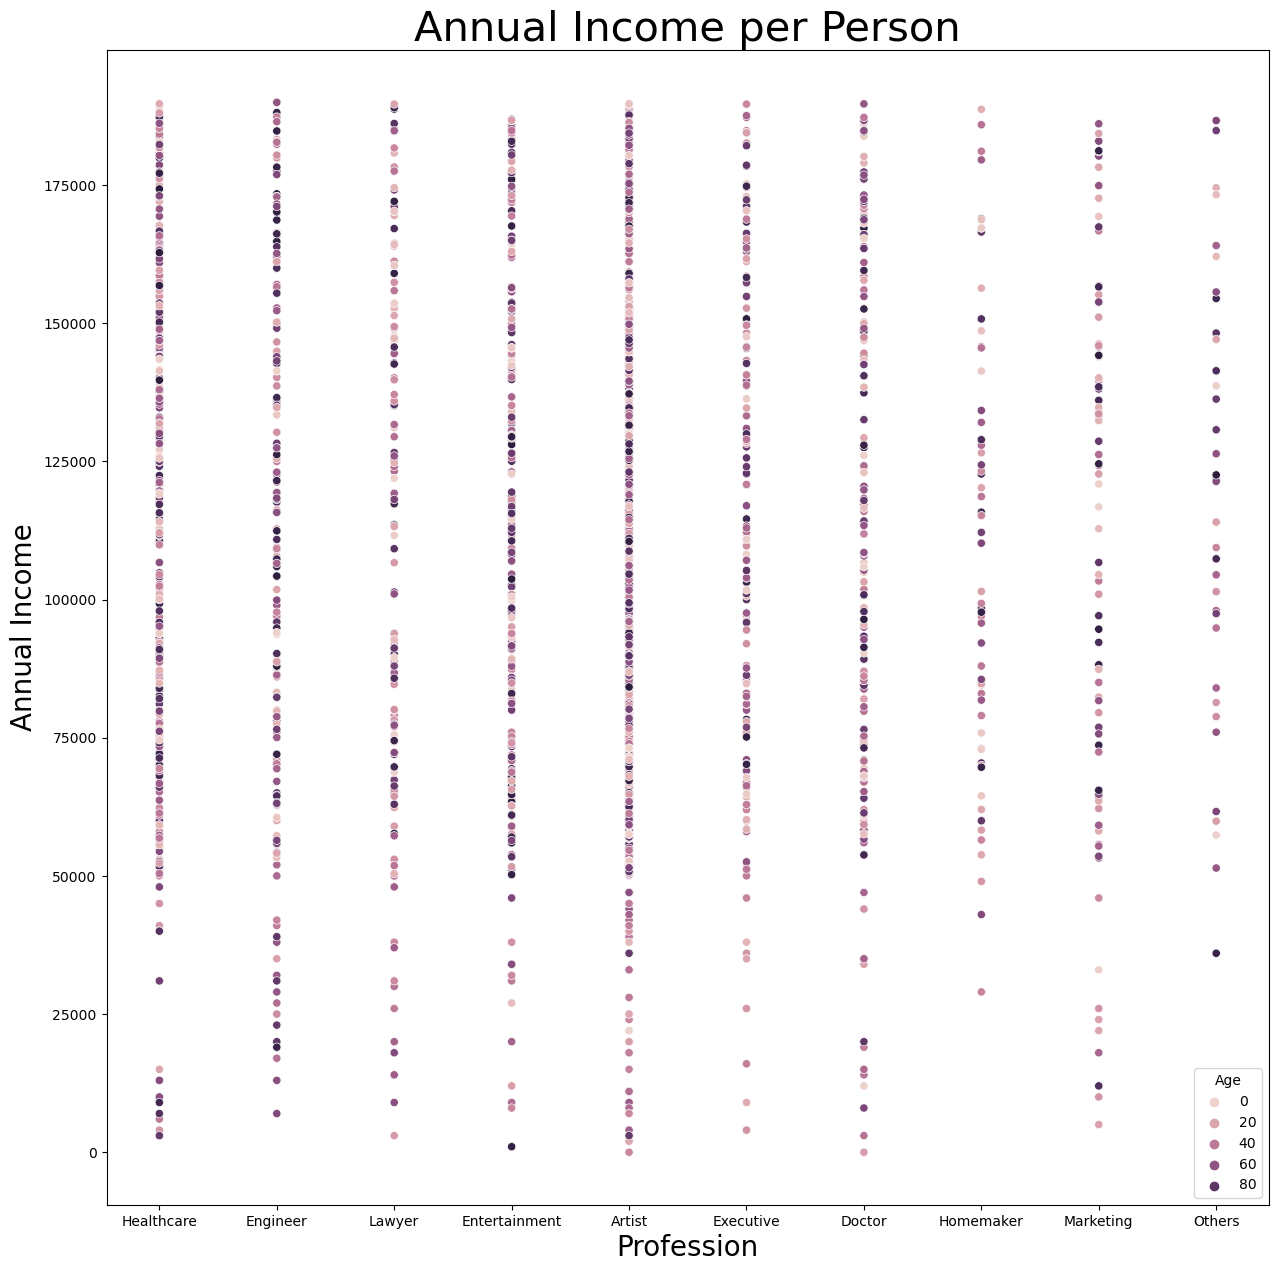

In [16]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="Profession",y="Annual Income ($)",hue="Age",data=data)
plt.title("Annual Income per Person",fontsize=30)
plt.xlabel("Profession",fontsize=20)
plt.ylabel("Annual Income",fontsize=20)
plt.show()

# 10.Which Profession is getting high Annual Income ?

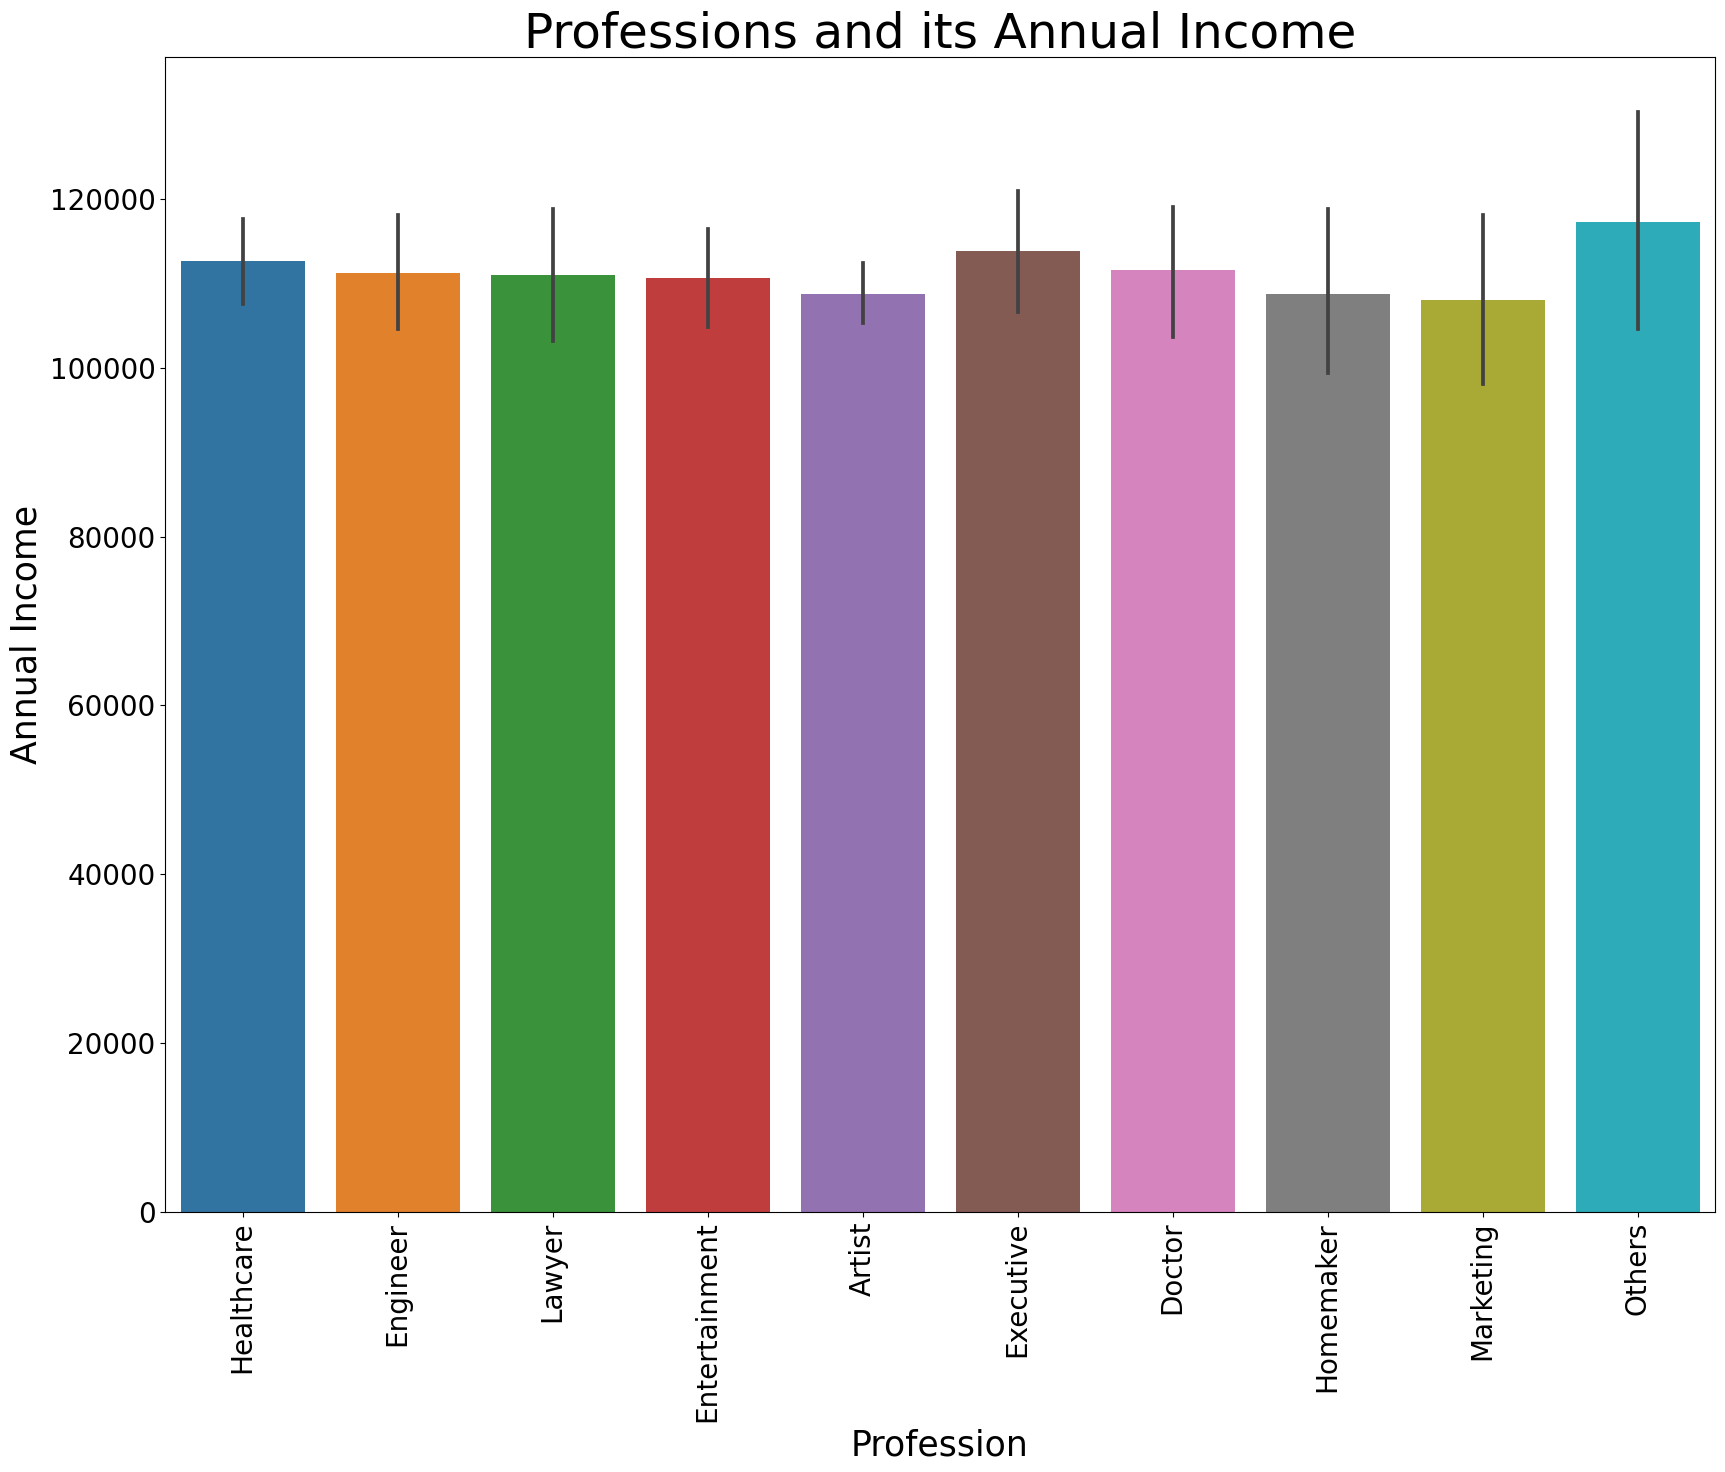

In [17]:
plt.figure(figsize=(20,15))
sns.barplot(x="Profession",y="Annual Income ($)",data=data)
plt.title("Professions and its Annual Income",fontsize=35)
plt.xlabel("Profession",fontsize=25)
plt.ylabel("Annual Income",fontsize=25)
plt.xticks(rotation="vertical",fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# 11.Distribution of spending score for each age and gender

<Figure size 1500x1500 with 0 Axes>

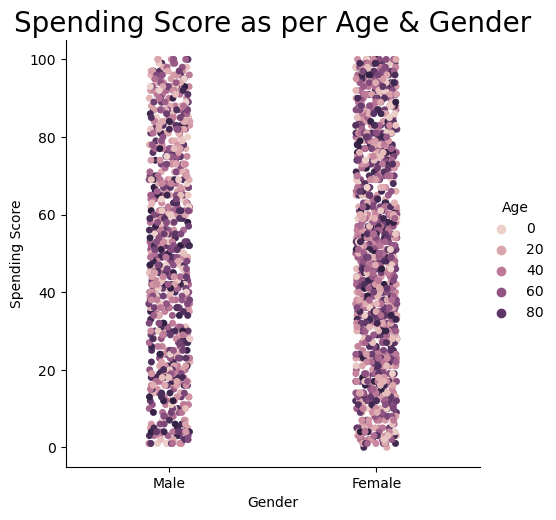

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(data=data,x="Gender",y="Spending Score (1-100)",hue="Age")
plt.xlabel("Gender",fontsize=10)
plt.ylabel("Spending Score",fontsize=10)
plt.title("Spending Score as per Age & Gender",fontsize=20)
plt.show()

# 12.Distribution of Work Experience

In [19]:
data["Work Experience"]=data["Work Experience"].astype("str")

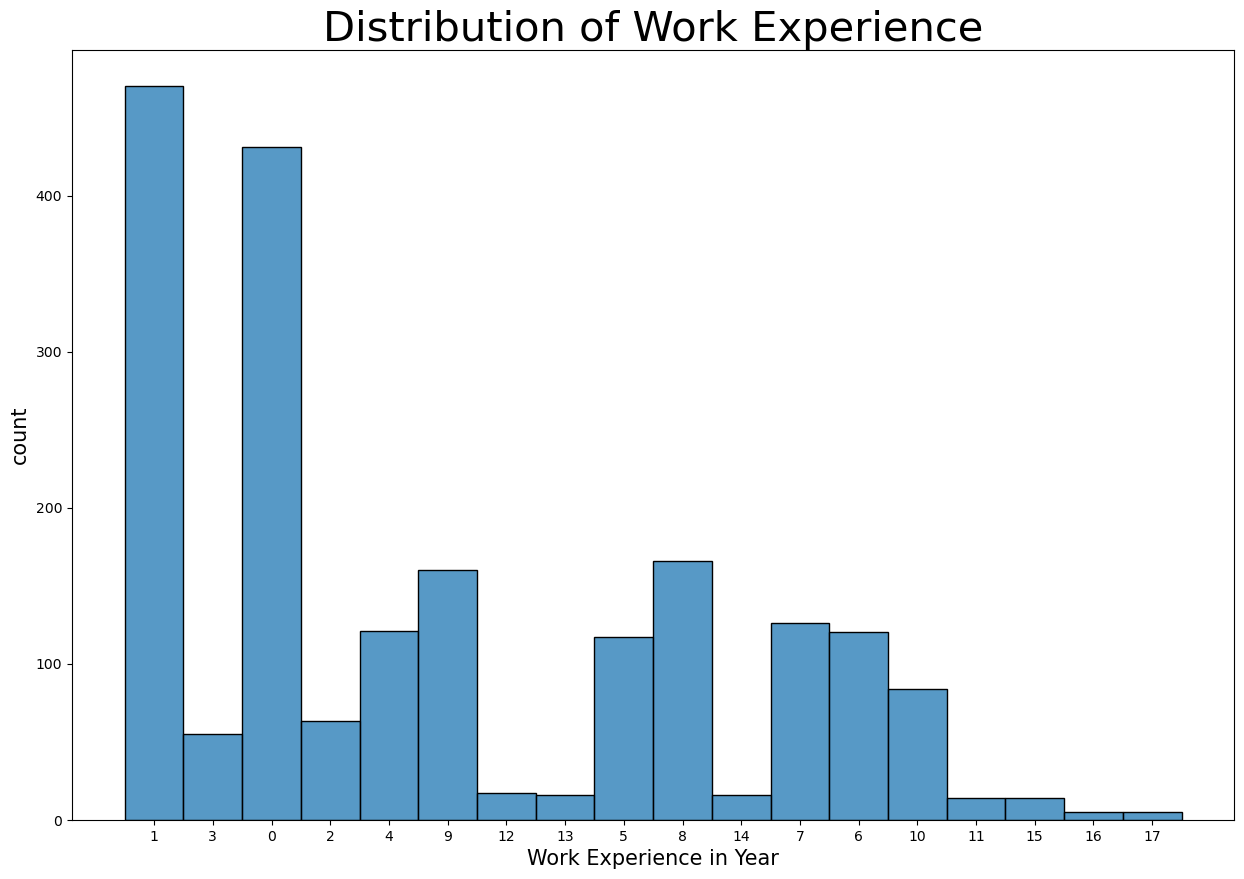

In [20]:
plt.figure(figsize=(15,10))
sns.histplot(data=data,x="Work Experience")
plt.xlabel('Work Experience in Year',fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Distribution of Work Experience",fontsize=30)
plt.show()

# 13.Which profession is chossed by most people ?

In [21]:
v=data["Profession"].value_counts()
v

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Others            35
Name: Profession, dtype: int64

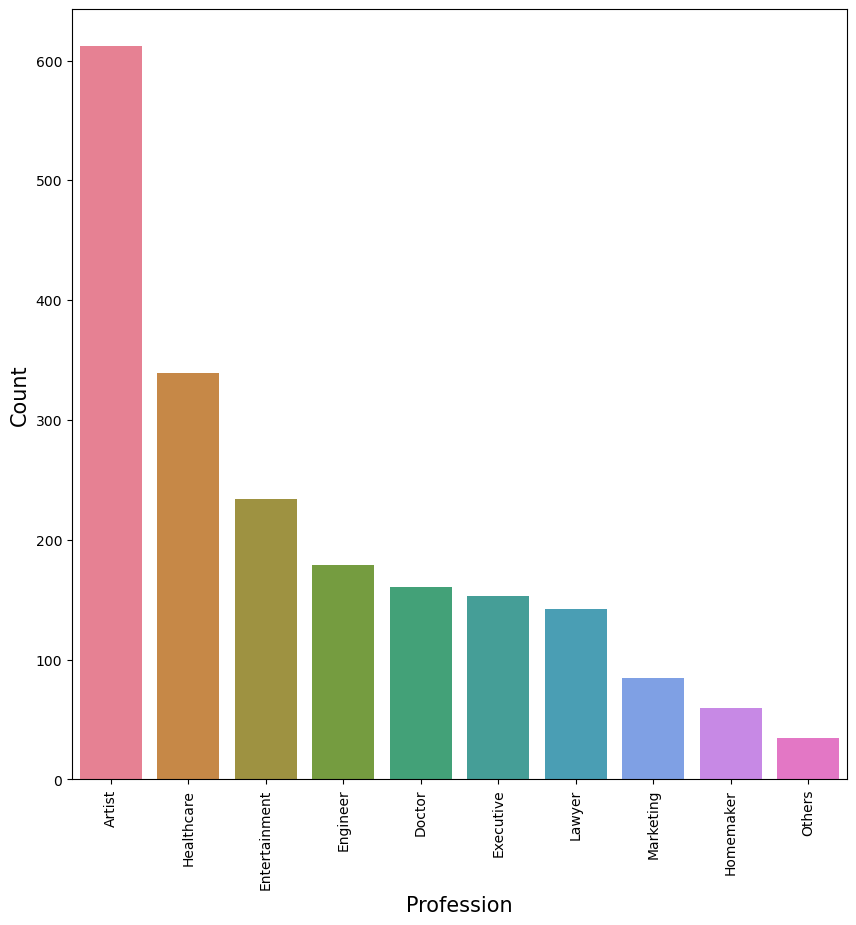

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x=data["Profession"],order=v.index,palette="husl")
plt.xlabel("Profession",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation="vertical")
plt.show()